In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf

In [2]:
path = 'Work_to_be_Completed_ILBS'
pid = []
image_file = []
for fname in os.listdir(path):
    if fname.isdigit():
        pid.append(fname)
        for fname_ins in os.listdir(path+'\\'+fname):
            image_file.append(path+'\\'+fname+'\\'+fname_ins)

In [3]:
df_f = pd.DataFrame(image_file)

In [4]:
df_f.shape

(35011, 1)

In [5]:
xls = pd.ExcelFile(path+'\\'+'HVPG Training Value_1.xlsx',engine='openpyxl')
df_label_train = pd.read_excel(xls,'Train')
df_label_test = pd.read_excel(xls,'Test')

In [6]:
labels_train = []
for row in df_f.values.tolist():
    id_ = int(row[0].split('\\')[-2])
    if id_ == 910:
        id_ = 9109
    for rows in df_label_train.values.tolist():
        if id_==rows[0]:
            labels_train.append([row[0],rows[-1]])
           # print(label)
        #break
    #print(row,id_)
    #break

In [7]:
labels_test = []
for row in df_f.values.tolist():
    id_ = int(row[0].split('\\')[-2])
    if id_ == 910:
        id_ = 9109
    for rows in df_label_test.values.tolist():
        if id_==rows[0]:
            labels_test.append([row[0],rows[-1]])
           # print(label)
        #break
    #print(row,id_)
    #break

In [8]:
df_train = pd.DataFrame(labels_train,columns=['path','label'])

In [9]:
df_test = pd.DataFrame(labels_test,columns=['path','label'])

In [10]:
from tensorflow import keras
#X = df['imarray'].values
y_train = np.array(df_train['label'])
y_train = keras.utils.to_categorical(y_train)

y_test = np.array(df_test['label'])
y_test = keras.utils.to_categorical(y_test)

In [11]:
all_images_train = []
IMG_HEIGHT = IMG_WIDTH =150
for row in df_train['path']:
    image= cv2.imread( row, cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255
    #image = np.expand_dims(image, axis=0)
    all_images_train.append(image)

In [12]:
all_images_test = []
IMG_HEIGHT = IMG_WIDTH =150
for row in df_test['path']:
    image= cv2.imread( row, cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255
    #image = np.expand_dims(image, axis=0)
    all_images_test.append(image)

In [13]:
train_ = np.array(all_images_train)

In [14]:
test_ = np.array(all_images_test)

In [15]:
X_train = np.expand_dims(train_,axis=3)
X_test = np.expand_dims(test_, axis=3)

# VGG

In [70]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(28, activation='sigmoid', name='output'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 150, 150, 64)      640       
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 37, 37, 256)     

In [71]:
history = model.fit(X_train, y_train,validation_split=0.25, batch_size=64, epochs=40, verbose=1,shuffle=True)

Train on 22955 samples, validate on 7652 samples
Epoch 1/40
22955/22955 [==============================] - 93s 4ms/sample - loss: 3.3313 - accuracy: 0.0964 - val_loss: 3.3307 - val_accuracy: 0.0797
Epoch 2/40
22955/22955 [==============================] - 87s 4ms/sample - loss: 3.3294 - accuracy: 0.1053 - val_loss: 3.3292 - val_accuracy: 0.0797
Epoch 3/40
22955/22955 [==============================] - 87s 4ms/sample - loss: 3.3272 - accuracy: 0.1053 - val_loss: 3.3274 - val_accuracy: 0.0797
Epoch 4/40
22955/22955 [==============================] - 87s 4ms/sample - loss: 3.3246 - accuracy: 0.1053 - val_loss: 3.3253 - val_accuracy: 0.0797
Epoch 5/40
22955/22955 [==============================] - 87s 4ms/sample - loss: 3.3215 - accuracy: 0.1053 - val_loss: 3.3228 - val_accuracy: 0.0797
Epoch 6/40
22955/22955 [==============================] - 87s 4ms/sample - loss: 3.3176 - accuracy: 0.1053 - val_loss: 3.3194 - val_accuracy: 0.0797
Epoch 7/40
22955/22955 [==============================] -

# OLD 2

In [52]:
from tensorflow.keras.regularizers import l2
model_1 = Sequential()
model_1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(150, 150,1)))
model_1.add(BatchNormalization())
model_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
# Densely connected layers
model_1.add(Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), bias_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Dropout(.5))
model_1.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), bias_regularizer=l2(0.001)))
model_1.add(Dropout(.25))

# output layer
model_1.add(Dense(28, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(0.001),
              metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
print(model_1.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 150, 150, 16)      160       
_________________________________________________________________
batch_normalization_18 (Batc (None, 150, 150, 16)      64        
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 75, 75, 64)      

In [53]:
%%time
import tensorflow as tf
history = model_1.fit(X_train, y_train,callbacks=[reduce_lr],validation_split=0.25, batch_size=64, epochs=40, verbose=1,shuffle=True)

Train on 22955 samples, validate on 7652 samples
Epoch 1/40
22955/22955 [==============================] - 38s 2ms/sample - loss: 4.3236 - accuracy: 0.1010 - val_loss: 3.9213 - val_accuracy: 0.1541
Epoch 2/40
22955/22955 [==============================] - 34s 1ms/sample - loss: 3.1777 - accuracy: 0.2803 - val_loss: 4.4668 - val_accuracy: 0.0495
Epoch 3/40
22955/22955 [==============================] - 34s 1ms/sample - loss: 2.5529 - accuracy: 0.4544 - val_loss: 4.6604 - val_accuracy: 0.0404
Epoch 4/40
22955/22955 [==============================] - 34s 1ms/sample - loss: 2.1198 - accuracy: 0.6005 - val_loss: 4.7046 - val_accuracy: 0.0427
Epoch 5/40
22955/22955 [==============================] - 34s 1ms/sample - loss: 1.9088 - accuracy: 0.6717 - val_loss: 4.7337 - val_accuracy: 0.0405
Epoch 6/40
22955/22955 [==============================] - 34s 1ms/sample - loss: 1.8482 - accuracy: 0.6938 - val_loss: 4.7311 - val_accuracy: 0.0404
Epoch 7/40
22955/22955 [==============================] -

KeyboardInterrupt: 

In [45]:
score = model_1.evaluate(X_test, y_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
score = model_1.evaluate(X_train, y_train, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

6189/6189 [==============================] - 2s 393us/sample - loss: 5.7445 - accuracy: 0.2973
Test loss: 5.744454553505199
Test accuracy: 0.29730165
30607/30607 [==============================] - 12s 379us/sample - loss: 1.3129 - accuracy: 0.8874
Train loss: 1.3129004359490675
Train accuracy: 0.88741136


# OLD 1

In [62]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(150, 150,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model_1.add(Dropout(.25))
model.add(Dense(28, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 341056)            0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               43655296  
_________________________________________________________________
dense_56 (Dense)             (None, 28)                3612      
Total params: 43,677,724
Trainable params: 43,677,724
Non-trainable params: 0
_________________________________________

In [63]:
import tensorflow as tf
history = model.fit(X_train, y_train,validation_split=0.1, batch_size=100, epochs=55, verbose=1)

Train on 27546 samples, validate on 3061 samples
Epoch 1/55
27546/27546 [==============================] - 23s 818us/sample - loss: 3.0460 - accuracy: 0.1298 - val_loss: 3.0379 - val_accuracy: 0.0069
Epoch 2/55
27546/27546 [==============================] - 22s 808us/sample - loss: 2.7706 - accuracy: 0.2190 - val_loss: 3.0052 - val_accuracy: 0.0196
Epoch 3/55
27546/27546 [==============================] - 22s 811us/sample - loss: 2.6251 - accuracy: 0.2674 - val_loss: 3.0697 - val_accuracy: 0.0082
Epoch 4/55
27546/27546 [==============================] - 22s 795us/sample - loss: 2.4644 - accuracy: 0.3259 - val_loss: 3.1052 - val_accuracy: 0.0180
Epoch 5/55
27546/27546 [==============================] - 22s 795us/sample - loss: 2.2714 - accuracy: 0.3940 - val_loss: 3.1529 - val_accuracy: 0.0216
Epoch 6/55
27546/27546 [==============================] - 22s 800us/sample - loss: 2.0369 - accuracy: 0.4816 - val_loss: 3.1479 - val_accuracy: 0.0454
Epoch 7/55
27546/27546 [=====================

27546/27546 [==============================] - 23s 818us/sample - loss: 0.0302 - accuracy: 0.9859 - val_loss: 10.5547 - val_accuracy: 0.0039
Epoch 55/55
27546/27546 [==============================] - 23s 846us/sample - loss: 0.0301 - accuracy: 0.9847 - val_loss: 10.8270 - val_accuracy: 0.0042


In [18]:
score = model.evaluate(X_test, y_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[5])
score = model.evaluate(X_train, y_train, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[5])

6189/6189 [==============================] - 3s 413us/sample - loss: 12.9507 - TP: 2097.0000 - FP: 4067.0000 - TN: 163036.0000 - FN: 4092.0000 - accuracy: 0.3393 - precision: 0.3402 - recall: 0.3388 - auc: 0.6623
Test loss: 12.95073006419986
Test accuracy: 0.3393117
30607/30607 [==============================] - 12s 379us/sample - loss: 1.3282 - TP: 27207.0000 - FP: 3299.0000 - TN: 823090.0000 - FN: 3400.0000 - accuracy: 0.8889 - precision: 0.8919 - recall: 0.8889 - auc: 0.9543
Train loss: 1.3281505224375183
Train accuracy: 0.8889143


In [104]:
path = r'D:\ILBS_14_8_21_Sanjeev\Work_to_be_Completed_ILBS\186877'
image_file = []
IMG_HEIGHT = IMG_WIDTH=150
for fname in os.listdir(path):
    #print(fname)
    image= cv2.imread( path+'\\'+fname, cv2.IMREAD_GRAYSCALE)
    #print(image[0])
    #image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    #image = np.expand_dims(image, axis=0)
    image_file.append(image)

In [105]:
p = []
for item in image_file:
    p.append(np.mean(item))

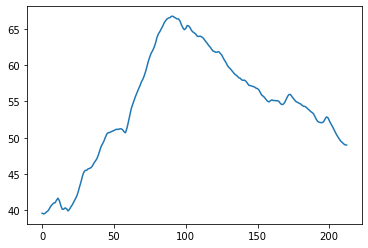

In [106]:
plt.plot(p)

In [113]:
path = 'Work_to_be_Completed_ILBS'
pid = []
image_file = []
for fname in os.listdir(path):
    if fname.isdigit():
        pid.append(fname)
        print(fname)
        os.makedirs(os.path.join("D:\ILBS_14_8_21_Sanjeev\ILBS2_Cropped_Volumes",fname))

00910
110991
115428
119394
121800
123453
129155
134645
141396
142836
145692
148415
152674
154032
154974
157025
158066
159071
161885
162051
163422
163557
166060
171969
172738
173378
174323
174922
175633
175634
176381
176633
177080
177541
178788
181077
181571
181585
183370
183481
183556
183684
184158
184206
184530
185684
185691
185700
185703
186097
186247
186436
186449
186632
186655
186667
186712
186877
186970
187054
187072
187084
187095
187107
187108
187162
187184
187195
187199
187407
187442
187479
187599
187603
187615
187698
187868
187876
187897
187921
188081
188084
188094
188141
188224
188267
188674
188726
188974
189082
189138
189143
189216
189243
189689
189715
19699
31322
45341
49565
95470
99036


In [111]:
os.makedirs(os.path.join('D:\ILBS_14_8_21_Sanjeev\ILBS2_Cropped_Volumes','00910'))

In [185]:
path = 'Work_to_be_Completed_ILBS'
pid = []
image_file = []
for fname in os.listdir(path):
    if fname.isdigit():
        pid.append(fname)
#print(len(pid))
import shutil
folder = pid[95]
print(folder)
files = os.listdir(os.path.join(path,folder))
a = 21
for i in range(a,a+150):
    p = shutil.copyfile(os.path.join(path, folder, files[i]), os.path.join('D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes',folder,files[i]))
    print(p)

189715
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00022.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00023.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00024.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00025.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00026.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00027.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00028.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00029.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00030.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00031.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00032.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00033.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00034.jpg
D:\ILBS_14_8_21_Sanjeev\ILBS_Cropped_Volumes\189715\IMG-0073-00035.jpg

In [184]:
pid[100]

'95470'